In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
X = dataset[:, 0:10]

In [12]:
Y = dataset[:, 10]

In [13]:
from sklearn import preprocessing

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [19]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [23]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10, )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 271us/step - loss: 0.6912 - acc: 0.5470 - val_loss: 0.6865 - val_acc: 0.6301
Epoch 2/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.6831 - acc: 0.6654 - val_loss: 0.6796 - val_acc: 0.7534
Epoch 3/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.6769 - acc: 0.7114 - val_loss: 0.6741 - val_acc: 0.7626
Epoch 4/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6719 - acc: 0.7241 - val_loss: 0.6694 - val_acc: 0.7123
Epoch 5/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.6675 - acc: 0.6967 - val_loss: 0.6650 - val_acc: 0.7123
Epoch 6/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.6632 - acc: 0.6986 - val_loss: 0.6606 - val_acc: 0.7078
Epoch 7/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6591 - acc: 0.7006 - val_loss: 0.6562 - val_acc: 0.7169


1022/1022 [==============================] - 0s 34us/step - loss: 0.3463 - acc: 0.8669 - val_loss: 0.3146 - val_acc: 0.8858
Epoch 61/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3444 - acc: 0.8591 - val_loss: 0.3088 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3418 - acc: 0.8659 - val_loss: 0.3063 - val_acc: 0.8858
Epoch 63/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.3396 - acc: 0.8630 - val_loss: 0.3037 - val_acc: 0.8858
Epoch 64/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.3377 - acc: 0.8611 - val_loss: 0.3013 - val_acc: 0.8858
Epoch 65/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3352 - acc: 0.8640 - val_loss: 0.2992 - val_acc: 0.8858
Epoch 66/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3333 - acc: 0.8659 - val_loss: 0.2974 - val_acc: 0.8858
Epoch 67/100
1022/1022 [==============================

In [26]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 33us/step


0.8812785396292874

In [27]:
import matplotlib.pyplot as plt

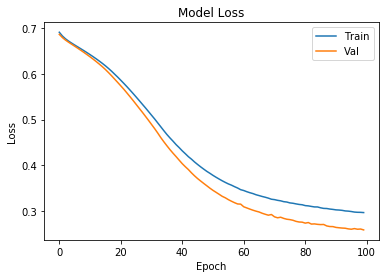

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

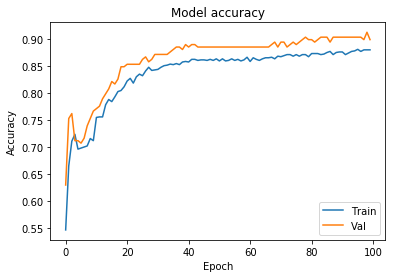

In [29]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4769 - acc: 0.7564 - val_loss: 0.2986 - val_acc: 0.8858
Epoch 2/100
1022/1022 [==============================] - 1s 796us/step - loss: 0.3725 - acc: 0.8415 - val_loss: 0.3017 - val_acc: 0.8813
Epoch 3/100
1022/1022 [==============================] - 1s 875us/step - loss: 0.3428 - acc: 0.8591 - val_loss: 0.2842 - val_acc: 0.8995
Epoch 4/100
1022/1022 [==============================] - 1s 853us/step - loss: 0.3080 - acc: 0.8718 - val_loss: 0.2323 - val_acc: 0.8950
Epoch 5/100
1022/1022 [==============================] - 1s 884us/step - loss: 0.2875 - acc: 0.8787 - val_loss: 0.2586 - val_acc: 0.8950
Epoch 6/100
1022/1022 [==============================] - 1s 878us/step - loss: 0.2614 - acc: 0.8796 - val_loss: 0.2306 - val_acc: 0.9178
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2698 - acc: 0.8953 - val_loss: 0.2330 - val_acc: 0.899

1022/1022 [==============================] - 1s 1ms/step - loss: 0.1593 - acc: 0.9305 - val_loss: 0.2906 - val_acc: 0.9132
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1337 - acc: 0.9432 - val_loss: 0.3221 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1307 - acc: 0.9462 - val_loss: 0.3422 - val_acc: 0.9132
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1495 - acc: 0.9315 - val_loss: 0.3226 - val_acc: 0.9178
Epoch 64/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1368 - acc: 0.9432 - val_loss: 0.3232 - val_acc: 0.8950
Epoch 65/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1490 - acc: 0.9266 - val_loss: 0.3083 - val_acc: 0.9087
Epoch 66/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1318 - acc: 0.9462 - val_loss: 0.3536 - val_acc: 0.9132
Epoch 67/100
1022/1022 [==============================] - 1s 

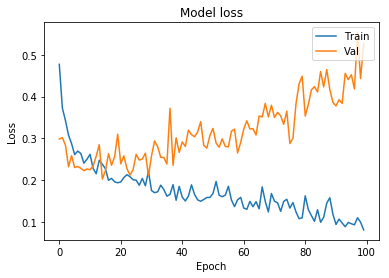

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

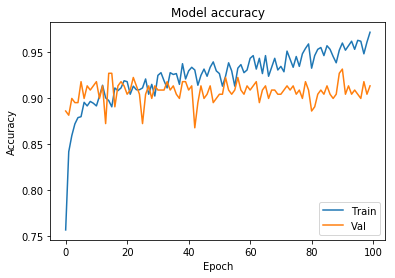

In [32]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3), 
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [35]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2568 - acc: 0.6223 - val_loss: 3.8777 - val_acc: 0.7900
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 1.6607 - acc: 0.8229 - val_loss: 0.6501 - val_acc: 0.8721
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5753 - acc: 0.8493 - val_loss: 0.5265 - val_acc: 0.8630
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5121 - acc: 0.8669 - val_loss: 0.4463 - val_acc: 0.8904
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4991 - acc: 0.8738 - val_loss: 0.4345 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4993 - acc: 0.8611 - val_loss: 0.4835 - val_acc: 0.8630
Epoch 7/100
1022/1022 [==============================] - 1s 996us/step - loss: 0.4958 - acc: 0.8650 - val_loss: 0.5007 - val_acc: 0.8356
Epoch

Epoch 61/100
1022/1022 [==============================] - 1s 990us/step - loss: 0.4418 - acc: 0.8836 - val_loss: 0.3868 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 1s 1000us/step - loss: 0.4510 - acc: 0.8787 - val_loss: 0.3945 - val_acc: 0.8995
Epoch 63/100
1022/1022 [==============================] - 1s 984us/step - loss: 0.4707 - acc: 0.8757 - val_loss: 0.4071 - val_acc: 0.9087
Epoch 64/100
1022/1022 [==============================] - 1s 973us/step - loss: 0.4487 - acc: 0.8650 - val_loss: 0.3925 - val_acc: 0.9178
Epoch 65/100
1022/1022 [==============================] - 1s 965us/step - loss: 0.4372 - acc: 0.8796 - val_loss: 0.3930 - val_acc: 0.8995
Epoch 66/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4493 - acc: 0.8699 - val_loss: 0.4015 - val_acc: 0.9087
Epoch 67/100
1022/1022 [==============================] - 1s 993us/step - loss: 0.4439 - acc: 0.8718 - val_loss: 0.3902 - val_acc: 0.9132
Epoch 68/100
1022/1022 [===========

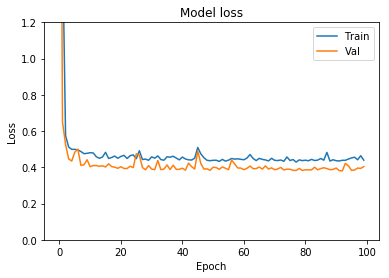

In [36]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

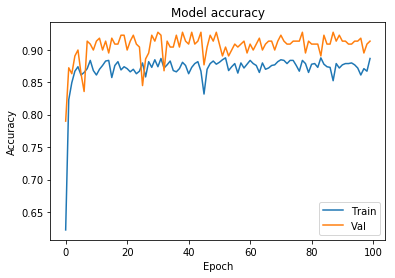

In [37]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()